# Reference
 - Hair et al. 2021, https://link.springer.com/book/10.1007/978-3-030-80519-7
 - https://mirror.twds.com.tw/CRAN/web/packages/seminr/seminr.pdf
 - data Corporate: https://www.pls-sem.net/downloads/pls-sem-using-r-a-workbook/
 - Hair, J. F., Risher, J. J., Sarstedt, M., & Ringle, C. M. (2019). When to use and how to report the results of PLS-SEM. European Business Review, 31(1), 2–24.
 - Fornell, C., & Larcker, D. F. (1981). Evaluating structural equation models with unobservable variables and measurement error. Journal of Marketing Research, 18(1), 39–50.
 - Henseler, J., Ringle, C. M., & Sarstedt, M. (2015). A new criterion for assessing discriminant validity in variance-based structural equation modeling. Journal of the Academy of Marketing Science, 43(1), 115–135.
 - Cohen, J. (1988). Statistical power analysis for the behavioral sciences. Mahwah, NJ: Lawrence Erlbaum.
 - https://github.com/sem-in-r/seminr/blob/master/vignettes/SEMinR.Rmd
 - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3900621
 - https://cran.r-project.org/web/packages/seminr/index.html

# Langkah utama untuk analisis PLS-SEM yaitu:
 - A. Persiapan ekosistem, data dan model,
 - B. Measurement Model Assessment (periksa indikator ke variabel),
 - C. Structural Model Assessment (periksa antar variabel),
 - D. uji Moderasi / Mediasi
 - E. Plot gambar hasil analisis seminr

### A. Persiapan ekosistem, data dan model,

In [ ]:
# a1. instal library seminr jika belum ada
# install.packages("seminr")

In [1]:
# Make the SEMinR library ready to use
library("seminr")

In [2]:
# a2. Load the corporate reputation data
corp_rep_data <- read.csv(file = "Corporate Reputation Data.csv", header = TRUE, sep = ";")

# Show the first several rows of the corporate reputation data
# head(corp_rep_data)

In [3]:
# a3. Create measurement model 
# gambar model di link https://github.com/sundimand/R-statistics/blob/49e78dfe8a42544758644fda341a984bdb64946a/corporate%20moderasi.png
simple_mm <- constructs(
  composite("COMP", multi_items("comp_", 1:3)), #competence
  composite("LIKE", multi_items("like_", 1:3)), #Likeability
  composite("CUSA", single_item("cusa")), #customer satisfaction
  composite("CSOR", single_item("csor_global")), #Corporate social responsibility
  composite("CUSL", multi_items("cusl_", 1:3)), #customer loyalty
  composite("SC", multi_items("switch_", 1:4)), #switching cost
  
  # siapkan construct moderasi SC dan CSOR
  interaction_term(iv = "CUSA", moderator = "SC", method = product_indicator),
  interaction_term(iv = "CUSA", moderator = "CSOR", method = orthogonal ) 
)

In [4]:
# a4. Create structural model 
simple_sm <- relationships(
  paths(to = c("CUSA","CUSL"), from = c("COMP", "LIKE")), 
  paths(to = "CUSL", from = c("CUSA", "CSOR", "SC", "CUSA*CSOR", "CUSA*SC"))
)

In [5]:
# a5. Estimate the model
# Estimate the model with default settings
corp_pls <- estimate_pls(data = corp_rep_data, 
    measurement_model = simple_mm,
    structural_model = simple_sm,
    missing_value = "-99")

Generating the seminr model
All 344 observations are valid.


In [6]:
summary(corp_pls)


Results from  package seminr (2.3.7)

Path Coefficients:
           CUSA   CUSL
R^2       0.295  0.573
AdjR^2    0.290  0.564
COMP      0.162 -0.007
LIKE      0.424  0.325
CUSA          .  0.465
CSOR          . -0.040
SC            .  0.079
CUSA*CSOR     .  0.018
CUSA*SC       . -0.085

Reliability:
          alpha  rhoC   AVE  rhoA
COMP      0.776 0.865 0.681 0.832
LIKE      0.831 0.899 0.747 0.836
CUSA      1.000 1.000 1.000 1.000
CSOR      1.000 1.000 1.000 1.000
SC        0.858 0.905 0.705 0.858
CUSA*CSOR 1.000 1.000 1.000 1.000
CUSA*SC   0.894 0.995 0.981 1.000
CUSL      0.831 0.899 0.748 0.839

Alpha, rhoC, and rhoA should exceed 0.7 while AVE should exceed 0.5


### B dan C
Langkah selanjutnya adalah 

 - B. Measurement Model Assessment (periksa indikator ke variabel),
 - C. Structural Model Assessment (periksa antar variabel),

detail prosesnya langkah B dan C bisa lihat video mengenai **PLS SEM dengan seminr** di link https://youtu.be/QIKLTsvOZLg?si=V15CyNzTP19LljFB

In [7]:
# 7. Bootstrap untuk inference (SE, CI, p-value)
set.seed(123)
corp_boot <- bootstrap_model(corp_pls, nboot = 1000)

Bootstrapping model using seminr...
SEMinR Model successfully bootstrapped


In [8]:
# 8. Ringkasan bootstrap (koef direct & interaksi, CI, p-value)
corp_boot_sum <- summary(corp_boot, alpha = 0.05)

In [9]:
# Inspect the bootstrapped structural paths
corp_boot_sum$bootstrapped_paths

                    Original Est. Bootstrap Mean Bootstrap SD T Stat. 2.5% CI
COMP  ->  CUSA              0.162          0.163        0.065   2.482   0.037
COMP  ->  CUSL             -0.007          0.001        0.059  -0.122  -0.120
LIKE  ->  CUSA              0.424          0.423        0.060   7.109   0.308
LIKE  ->  CUSL              0.325          0.320        0.060   5.385   0.199
CUSA  ->  CUSL              0.465          0.464        0.048   9.652   0.369
CSOR  ->  CUSL             -0.040         -0.040        0.047  -0.839  -0.130
SC  ->  CUSL                0.079          0.078        0.061   1.283  -0.039
CUSA*CSOR  ->  CUSL         0.018          0.018        0.045   0.386  -0.070
CUSA*SC  ->  CUSL          -0.085         -0.087        0.046  -1.828  -0.183
                    97.5% CI
COMP  ->  CUSA         0.287
COMP  ->  CUSL         0.112
LIKE  ->  CUSA         0.542
LIKE  ->  CUSL         0.430
CUSA  ->  CUSL         0.552
CSOR  ->  CUSL         0.053
SC  ->  CUSL     

Terlihat bahwa CUSA*SC -> CUSL memiliki nilai CI (2.5%-97.5%) adalah -0.183 dan -0.001, tidak ada nilai 0 di antara dua range data ini, artinya SC menjadi moderator yang signifikan pengaruh CUSA ke CUSL. 

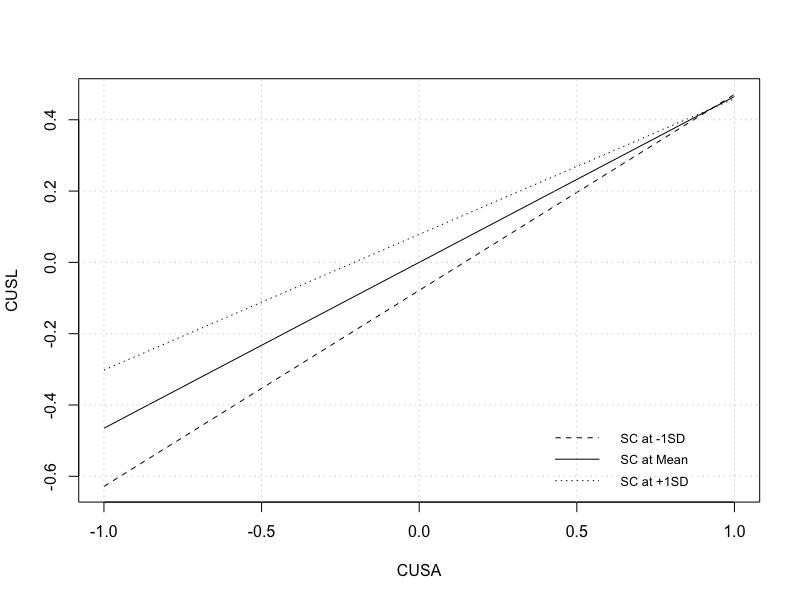

In [10]:
# Simple slope analysis plot (Hair et al. 2021)
slope_analysis(
  moderated_model = corp_pls,
  dv = "CUSL",
  moderator = "SC",
  iv = "CUSA",
  leg_place = "bottomright"
)

Garis tengah menggambarkan hubungan untuk tingkat biaya pengalihan rata‑rata (SC). Dua garis lainnya menggambarkan hubungan antara CUSA dan CUSL pada tingkat moderator SC yang lebih tinggi (yakni nilai rata‑rata SC ditambah satu unit standar deviasi) dan lebih rendah (yakni nilai rata‑rata SC dikurangi satu unit standar deviasi). Terlihat bahwa hubungan antara CUSA dan CUSL positif untuk ketiga garis tersebut yang ditunjukkan oleh kemiringan garis yang positif. Dengan demikian, tingkat kepuasan pelanggan yang lebih tinggi berkaitan dengan tingkat loyalitas pelanggan yang lebih tinggi. Karena efek moderasi negatif, pada tingkat SC yang tinggi, pengaruh CUSA terhadap CUSL menjadi lebih lemah, sedangkan pada tingkat SC yang rendah, pengaruh CUSA terhadap CUSL menjadi lebih kuat.

Selanjutnya, analisis menghasilkan nilai t sebesar −1,828 untuk jalur yang menghubungkan istilah interaksi dengan CUSL. Demikian pula, interval kepercayaan bootstrap 95% untuk efek istilah interaksi adalah [−0,183, −0,001]. Karena interval kepercayaan tidak mencakup nol, disimpulkan bahwa efek tersebut signifikan. Perlu dicatat bahwa hasil ini mungkin sedikit berbeda dari hasil Anda karena sifat acak dari proses bootstrap.

Secara keseluruhan, hasil ini memberikan dukungan jelas bahwa SC memiliki efek moderasi yang signifikan dan negatif pada hubungan antara CUSA dan CUSL. Semakin tinggi biaya pengalihan (SC), semakin lemah hubungan antara kepuasan pelanggan (CUSA) dan loyalitas pelanggan (CUSL).

In [11]:
# Inspect the bootstrapped indicator loadings 
corp_boot_sum$bootstrapped_loadings

# d1. Pastikan paket terpasang jika belum ada
# install.packages(c("DiagrammeR", "DiagrammeRsvg", "rsvg"))

library(DiagrammeR)
library(DiagrammeRsvg)
library(rsvg)

# d2. Buat atau tangkap graph HTMLwidget (grViz)
graph <- plot(corp_boot, title = "Bootstrapped Model")

# d3. Ekspor ke SVG string
svg_graph <- export_svg(graph)
nama_file <- "bootstrap_model_hd moderation.png"
# d4. Render ke PNG 1920×1080 px dan simpan ke file .png
rsvg_png(
  svg    = charToRaw(svg_graph),      # raw vector SVG
  file   = nama_file,  # nama file output
  width  = 1920,                      # lebar piksel
  height = 1080                       # tinggi piksel
)

message(sprintf("Gambar model sudah tersimpan di folder dengan nama %s", nama_file))

Linking to librsvg 2.61.0
Gambar model sudah tersimpan di folder dengan nama bootstrap_model_hd moderation.png


## Variable

Competence (COMP)
comp_1 [The company] is a top competitor in its market
comp_2 As far as I know, [the company] is recognized worldwide
comp_3 I believe [the company] performs at a premium level

Likeability (LIKE)
like_1 [The company] is a company I can better identify with than other companies
like_2 [The company] is a company I would regret more not having if it no longer existed than I would other companies
like_3 I regard [the company] as a likeable company

Customer satisfaction (CUSA)
cusa I am satisfied with [the company]

Customer loyalty (CUSL)
cusl_1 I would recommend [company] to friends and relatives
cusl_2 If I had to choose again, I would choose [company] as my mobile phone service provider
cusl_3 I will remain a customer of [company] in the future

Quality (QUAL)
qual_1 The products/services offered by [the company] are of high quality
qual_2 [The company] is an innovator, rather than an imitator with respect to [industry]
qual_3 [The company]’s products/services offer good value for money
qual_4 The products/services offered by [the company] are good
qual_5 Customer concerns are held in high regard at [the company]
qual_6 [The company] is a reliable partner for customers
qual_7 [The company] is a trustworthy company
qual_8 I have a lot of respect for [the company]

Performance (PERF)
perf_1 [The company] is a very well-managed company
perf_2 [The company] is an economically stable company
perf_3 The business risk for [the company] is modest compared to its competitors
perf_4 [The company] has growth potential
perf_5 [The company] has a clear vision about the future of the company

Corporate social responsibility (CSOR)
csor_1 [The company] behaves in a socially conscious way
csor_2 [The company] is forthright in giving information to the public
csor_3 [The company] has a fair attitude toward competitors
csor_4 [The company] is concerned about the preservation of the environment
csor_5 [The company] is not only concerned about profits

Attractiveness (ATTR)
attr_1 [The company] is successful in attracting high-quality employees
attr_2 I could see myself working at [the company]
attr_3 I like the physical appearance of [the company] (company, buildings, shops, etc.)

Switching costs indicators (SC)
switch_1 It takes me a great deal of time to switch to another company
switch_2 It costs me too much to switch to another company
switch_3 It takes a lot of effort to get used to a new company with its specific “rules” and practices
switch_4 In general, it would be a hassle switching to another company

Kita akan coba moderasi SC dan CSOR ke CUSA

Single-item measures of QUAL, PERF, CSOR, and ATTR for the redundancy analysis
qual_global Please assess the overall quality of [the company’s] activities
perf_global Please assess [the company’s] overall performance
csor_global Please assess the extent to which [the company] acts in socially conscious ways
attr_global [The company] has a high overall attractiveness